## A Blending Problem

### Problem Description
Whiskas cat food, shown above, is manufactured by Uncle Ben’s. Uncle Ben’s want to produce their cat food products as cheaply as possible while ensuring they meet the stated nutritional analysis requirements shown on the cans. Thus they want to vary the quantities of each ingredient used (the main ingredients being chicken, beef, mutton, rice, wheat and gel) while still meeting their nutritional standards.

The costs of the chicken, beef, and mutton are $0.013, \$0.008 and $0.010 respectively, while the costs of the rice, wheat and gel are \$0.002, $0.005 and \$0.001 respectively. (All costs are per gram.) For this exercise we will ignore the vitamin and mineral ingredients. (Any costs for these are likely to be very small anyway.)

Each ingredient contributes to the total weight of protein, fat, fibre and salt in the final product. The contributions (in grams) per gram of ingredient are given in the table below.

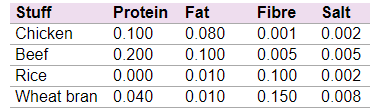

#### Simplified Formulation
First we will consider a simplified problem to build a simple Python model.

#### Identify the Decision Variables
Assume Whiskas want to make their cat food out of just two ingredients: Chicken and Beef. We will first define our decision variables:

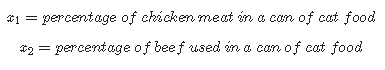

The limitations on these variables (greater than zero) must be noted but for the Python implementation, they are not entered or listed separately or with the other constraints.

#### The Constraints

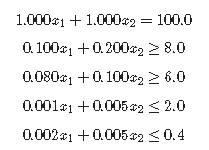

### Problem is minimum cost to produce cat food

In [4]:
import pulp as p
import pandas as pd

In [77]:
# A dictionary of the costs of each of the Ingredients is created
costs = {'CHICKEN': 0.013, 'BEEF': 0.008, 
         'MUTTON': 0.010, 'RICE': 0.002, 
         'WHEAT': 0.005, 'GEL': 0.001}

# A dictionary of the protein percent in each of the Ingredients is created
proteinPercent = {'CHICKEN': 0.100, 'BEEF': 0.200, 
                  'MUTTON': 0.150, 'RICE': 0.000, 
                  'WHEAT': 0.040, 'GEL': 0.000}

# A dictionary of the fat percent in each of the Ingredients is created
fatPercent = {'CHICKEN': 0.080, 'BEEF': 0.100, 
              'MUTTON': 0.110, 'RICE': 0.010, 
              'WHEAT': 0.010, 'GEL': 0.000}

# A dictionary of the fibre percent in each of the Ingredients is created
fibrePercent = {'CHICKEN': 0.001, 'BEEF': 0.005, 
                'MUTTON': 0.003, 'RICE': 0.100, 
                'WHEAT': 0.150, 'GEL': 0.000}

# A dictionary of the salt percent in each of the Ingredients is created
saltPercent = {'CHICKEN': 0.002, 'BEEF': 0.005, 
               'MUTTON': 0.007, 'RICE': 0.002, 
               'WHEAT': 0.008, 'GEL': 0.000}

data = pd.DataFrame({'costs':costs,
                     'proteinPercent': proteinPercent,
                     'fatPercent': fatPercent,
                     'fibrePercent': fibrePercent,
                     'saltPercent': saltPercent})

In [78]:
data

,costs,proteinPercent,fatPercent,fibrePercent,saltPercent
CHICKEN,0.013,0.10,0.08,0.001,0.002
BEEF,0.008,0.20,0.10,0.005,0.005
MUTTON,0.010,0.15,0.11,0.003,0.007
RICE,0.002,0.00,0.01,0.100,0.002
WHEAT,0.005,0.04,0.01,0.150,0.008
GEL,0.001,0.00,0.00,0.000,0.000


In [79]:
#Protein >= 8g

#Fat >= 6g

#Fibre <= 2g

#Salt <= 0.4g

In [80]:
chicken = p.LpVariable("chicken", lowBound=0)

In [81]:
data.index

Index(['CHICKEN', 'BEEF', 'MUTTON', 'RICE', 'WHEAT', 'GEL'], dtype='object')

In [82]:
degisken = []
for i in data.index:
    degisken.append(p.LpVariable(i, lowBound=0))
degisken

[CHICKEN, BEEF, MUTTON, RICE, WHEAT, GEL]

In [105]:
data["variable"] = degisken
data

,costs,proteinPercent,fatPercent,fibrePercent,saltPercent,variable
CHICKEN,0.013,0.10,0.08,0.001,0.002,CHICKEN
BEEF,0.008,0.20,0.10,0.005,0.005,BEEF
MUTTON,0.010,0.15,0.11,0.003,0.007,MUTTON
RICE,0.002,0.00,0.01,0.100,0.002,RICE
WHEAT,0.005,0.04,0.01,0.150,0.008,WHEAT
GEL,0.001,0.00,0.00,0.000,0.000,GEL


In [116]:
obj = (data["costs"] * data["variable"]).sum()
obj

0.008*BEEF + 0.013*CHICKEN + 0.001*GEL + 0.01*MUTTON + 0.002*RICE + 0.005*WHEAT + 0.0

In [117]:
c1 = (data["proteinPercent"] * data["variable"]).sum() >= 8
c2 = (data["fatPercent"] * data["variable"]).sum() >= 6
c3 = (data["fibrePercent"] * data["variable"]).sum() <= 2
c4 = (data["saltPercent"] * data["variable"]).sum() <= 0.4
c5 = (data["variable"]).sum() == 100 

In [108]:
problem = p.LpProblem("maliyet", sense=p.LpMinimize)

In [118]:
problem += obj

C:\Users\gold\miniconda3\envs\cg1\lib\site-packages\pulp\pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [119]:
problem += c1
problem += c2
problem += c3
problem += c4
problem += c5

In [120]:
problem.solve()

1

In [122]:
# min cost
obj.value()

0.52

In [123]:
problem.objective

0.008*BEEF + 0.013*CHICKEN + 0.001*GEL + 0.01*MUTTON + 0.002*RICE + 0.005*WHEAT + 0.0

In [124]:
# min cost
problem.objective.value()

0.52

In [128]:
# Each of the variables is printed with it's resolved optimum value
for i in range(len(data)):
    print(data["variable"][i], ":", data["variable"][i].value())

CHICKEN : 0.0
BEEF : 60.0
MUTTON : 0.0
RICE : 0.0
WHEAT : 0.0
GEL : 40.0
